# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys

if "google.colab" in sys.modules:
    !wget https://storage.yandexcloud.net/travel-rag/dataset/geo-reviews-dataset-2023.csv

In [3]:
df = pd.read_csv("../data/raw/geo-reviews-dataset-2023.csv")

## Basic info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   address  500000 non-null  object 
 1   name_ru  499030 non-null  object 
 2   rating   500000 non-null  float64
 3   rubrics  500000 non-null  object 
 4   text     500000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 19.1+ MB


In [5]:
# В датасете присутствуют null-названия мест
df.isnull().sum()

address      0
name_ru    970
rating       0
rubrics      0
text         0
dtype: int64

In [6]:
df[df["name_ru"].isnull()]

,address,name_ru,rating,rubrics,text
322,"Москва, 8-я улица Соколиной Горы, 15А, стр. 23",NaN,5.0,Офис организации,"Ребята профи!\n\nОтлично подобрали модель, съе..."
5716,"Челябинская область, Златоуст, Таганайская ули...",NaN,5.0,Гостиница,"Гостиница действительно хорошая, удобно распол..."
5717,"Челябинская область, Златоуст, Таганайская ули...",NaN,5.0,Гостиница,Был здесь на кулинарном мастер-классе. Место а...
5718,"Челябинская область, Златоуст, Таганайская ули...",NaN,5.0,Гостиница,"Тихое место, в выходные возможно и шумно так к..."
5719,"Челябинская область, Златоуст, Таганайская ули...",NaN,5.0,Гостиница,"Воспитанные и отзывчивые официанты , вкусная к..."
...,...,...,...,...,...
498536,"Республика Башкортостан, Уфа, улица Менделеева...",NaN,5.0,"Скалодром;Спортивный клуб, секция",Были с детьми на 8 марта. Приехали специально ...
498688,"Москва, Юго-Восточный административный округ, ...",NaN,5.0,Изготовление памятников и надгробий;Изделия из...,"Отличное качество материала, прекрасное исполн..."
498913,"Самарская область, Волжский район, жилой район...",NaN,1.0,Магазин цветов;Копировальный центр;Товары для ...,"Цен на цветы которые находятся на витрине нет,..."
499006,"Волгоград, улица Гроссмана, 6",NaN,5.0,Салон красоты,Квалифицированные мастера. Работу выполняют с ...


In [7]:
df.describe(include="all")

,address,name_ru,rating,rubrics,text
count,500000,499030,500000.00000,500000,500000
unique,191925,148456,NaN,31793,499885
top,"Москва, Ходынский бульвар, 4",Пятёрочка,NaN,Гостиница,Хороший магазин\n
freq,340,6030,NaN,42242,10
mean,NaN,NaN,4.48160,NaN,NaN
std,NaN,NaN,1.14625,NaN,NaN
min,NaN,NaN,0.00000,NaN,NaN
25%,NaN,NaN,5.00000,NaN,NaN
50%,NaN,NaN,5.00000,NaN,NaN
75%,NaN,NaN,5.00000,NaN,NaN


## Распределение рейтинга

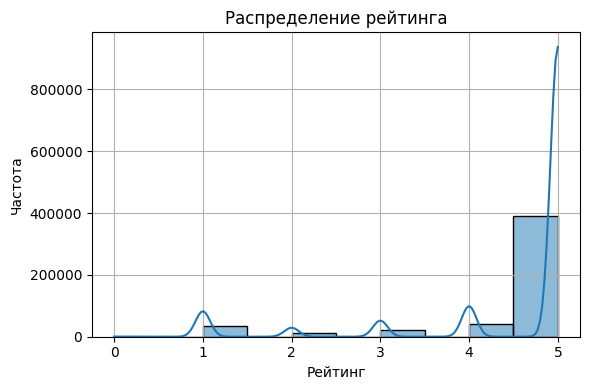

In [8]:
plt.figure(figsize=(6, 4))
sns.histplot(df["rating"].dropna(), bins=10, kde=True)
plt.title("Распределение рейтинга")
plt.xlabel("Рейтинг")
plt.ylabel("Частота")
plt.grid(True)
plt.tight_layout()
plt.show()

## Распределение рубрик

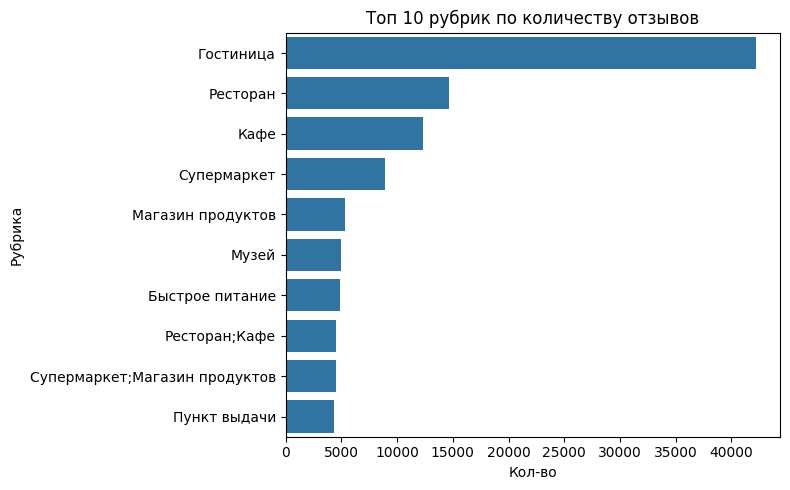

In [9]:
top_n = 10
top_rubrics = df["rubrics"].value_counts().nlargest(top_n).index

plt.figure(figsize=(8, 5))
sns.countplot(y="rubrics", data=df[df["rubrics"].isin(top_rubrics)], order=top_rubrics)
plt.title(f"Топ {top_n} рубрик по количеству отзывов")
plt.xlabel("Кол-во")
plt.ylabel("Рубрика")
plt.tight_layout()
plt.show()

## Анализ отзывов

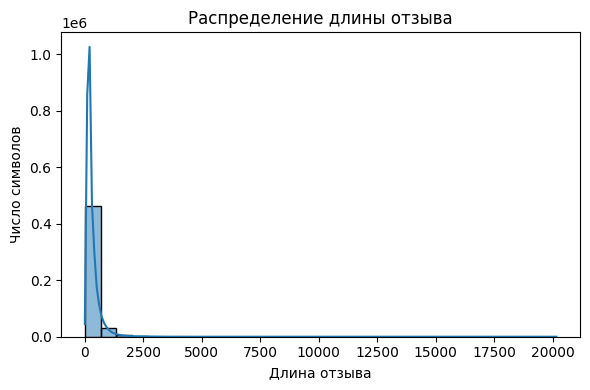

In [10]:
df["text_length"] = df["text"].astype(str).apply(len)

plt.figure(figsize=(6, 4))
sns.histplot(df["text_length"], bins=30, kde=True)
plt.title("Распределение длины отзыва")
plt.xlabel("Длина отзыва")
plt.ylabel("Число символов")
plt.tight_layout()
plt.show()

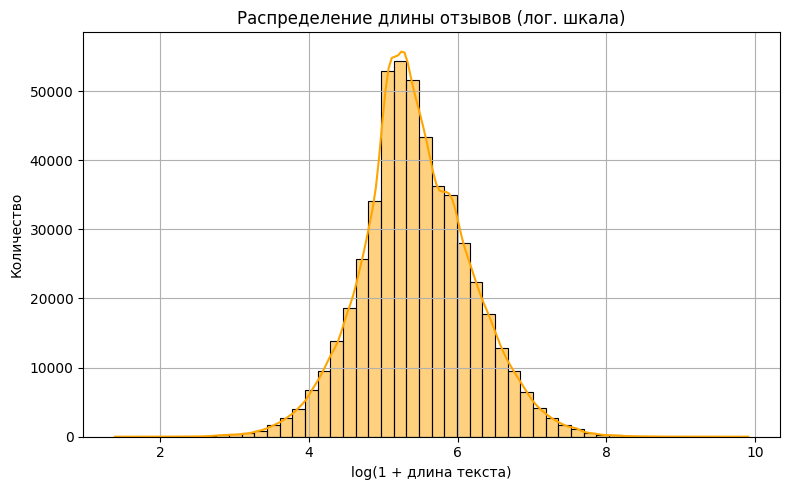

In [11]:
# Более подробно

plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df["text_length"]), bins=50, kde=True, color="orange")
plt.title("Распределение длины отзывов (лог. шкала)")
plt.xlabel("log(1 + длина текста)")
plt.ylabel("Количество")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
print("Средняя длина отзыва в символах:", int(df["text_length"].mean()))

Средняя длина отзыва в символах: 304


### WordCloud

Не будем учитывать стоп-слова

In [13]:
import nltk

nltk.download("stopwords")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

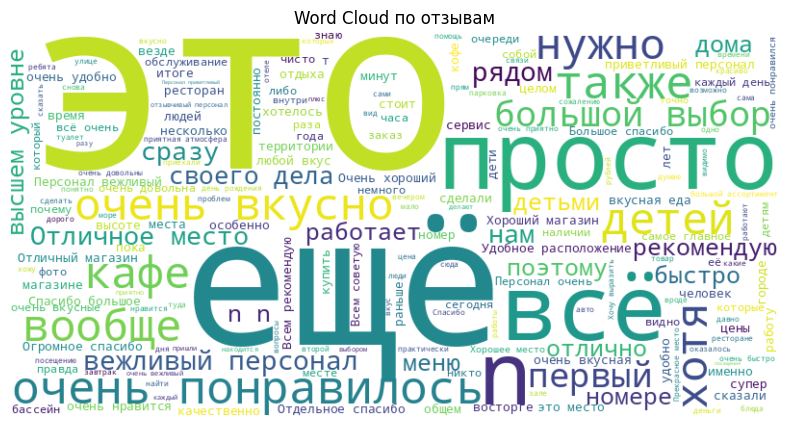

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords


stop_words = set(stopwords.words("russian"))

wordcloud = WordCloud(
    width=800, height=400, background_color="white", stopwords=stop_words
).generate(" ".join(df["text"].astype(str).dropna()))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud по отзывам")
plt.show()

### Sentiment analysis

Возьмем для примера 10К случайных отзывов из датасета и посмотрим на них подробнее

In [89]:
RANDOM_STATE = 42

sample_df = df.sample(10_000, random_state=42)

In [90]:
from transformers import pipeline


model = pipeline(model="seara/rubert-tiny2-russian-sentiment")


def analyze_sentiment(text) -> pd.Series:
    result = model(text)[0]  # example: {label': 'positive', 'score': 0.93}
    return pd.Series([result["label"], result["score"]])

Device set to use cuda:0


In [91]:
from tqdm import tqdm


tqdm.pandas()

sample_df[["sentiment", "sentiment_confidence"]] = sample_df["text"].progress_apply(
    analyze_sentiment
)

100%|██████████| 10000/10000 [01:02<00:00, 160.97it/s]


In [92]:
sample_df["sentiment"].value_counts()

,count
sentiment,
positive,7448
neutral,1854
negative,698


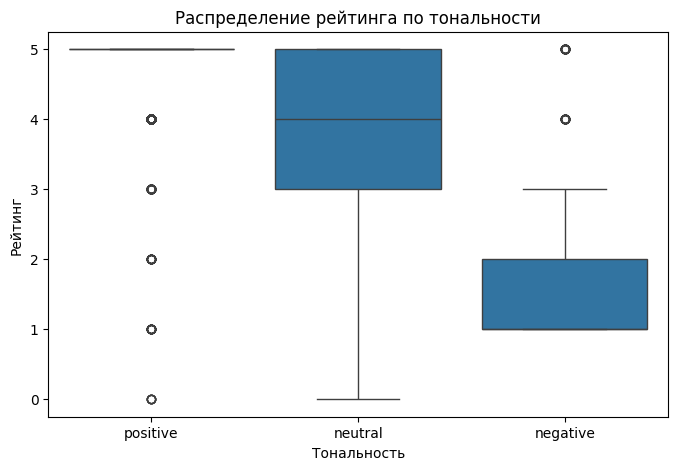

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=sample_df, x="sentiment", y="rating")
plt.title("Распределение рейтинга по тональности")
plt.xlabel("Тональность")
plt.ylabel("Рейтинг")
plt.show()

## Статистика по городам

In [35]:
df["region"] = df["address"].astype(str).str.split(",").str[0].str.strip()

grouped = (
    df.groupby("region")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)
grouped

,region,count
160,Москва,104774
268,Санкт-Петербург,52568
162,Московская область,49953
127,Краснодарский край,29646
247,Республика Татарстан,11662
...,...,...
231,Р-298,1
352,Южное кладбище,1
353,Якутия,1
354,Якутск,1


In [47]:
threshold = 9  # сколько записей нужно по региону, чтобы оставить его при фильтрации


counts = df["region"].value_counts()
valid_groups = counts[counts >= threshold].index

df_filtered = df[df["region"].isin(valid_groups)]
print(f"Удалено {df.shape[0] - df_filtered.shape[0]} записей при фильтрации")

grouped = (
    df_filtered.groupby("region")
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)
grouped

Удалено 604 записей при фильтрации


,region,count
76,Москва,104774
142,Санкт-Петербург,52568
78,Московская область,49953
60,Краснодарский край,29646
127,Республика Татарстан,11662
...,...,...
135,Рязанская обл.,9
209,городской округ Томск,9
179,Ханты-Мансийский АО,9
150,Сибирский федеральный округ,9


In [48]:
# TOP 20
grouped.head(20)

,region,count
76,Москва,104774
142,Санкт-Петербург,52568
78,Московская область,49953
60,Краснодарский край,29646
127,Республика Татарстан,11662
148,Свердловская область,11617
59,Краснодар,9073
85,Нижний Новгород,8545
70,Ленинградская область,8409
122,Республика Крым,8128


<Axes: xlabel='count', ylabel='region'>

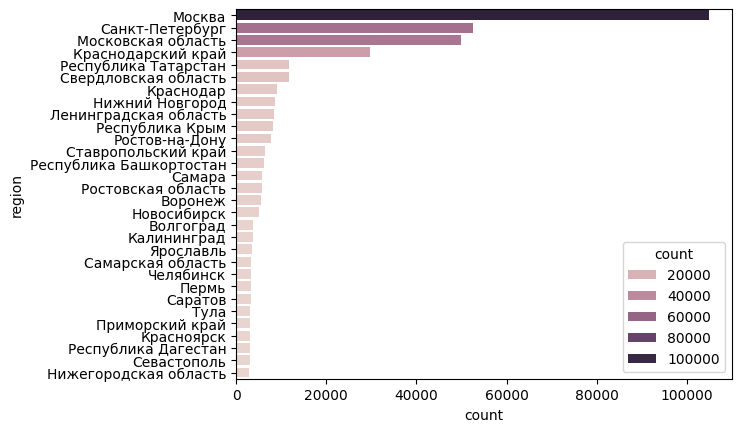

In [70]:
# TOP 20 городов
sns.barplot(data=grouped.head(30), x="count", y="region", hue="count")